In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style = "whitegrid")

In [2]:
df = pd.read_csv("data/data.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



Since we need to predict Sales for each product at a particular outlet.

Here's the plan
1. Exploratory data analysis
2. Outlier Detection
3. Impute missing values
4. Correlation plot
5. Standardization of data
6. Modelling

Firstly, we need to filter data for one item and outlet. Build the model on top of it.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
content_type = {
    "Low Fat": "Low Fat",
    "Regular": "Regular",
    "low fat": "Low Fat",
    "Lf": "Low Fat",
    "reg": "Regular"
}
df.Item_Fat_Content.replace(to_replace=content_type, inplace=True)

#### Data - Visulaizations

/var/folders/xf/_6m_tb052fn5p84tlt773rqr0000gn/T/ipykernel_8572/2663209424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Item_Weight)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

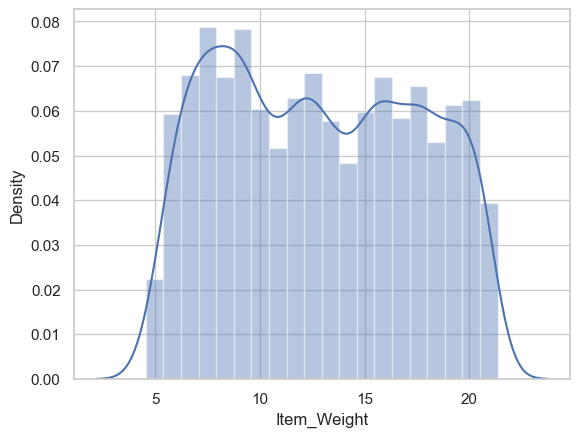

In [5]:
sns.distplot(df.Item_Weight)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

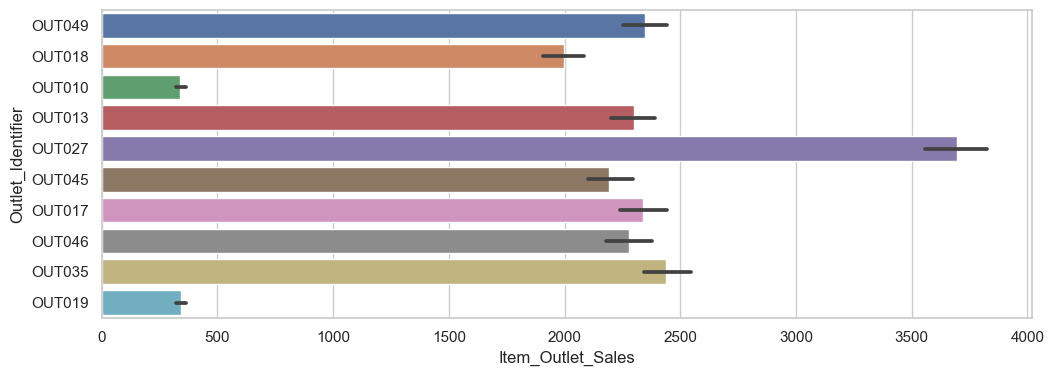

In [6]:
plt.figure(figsize=(12, 4))
sns.barplot(x = "Item_Outlet_Sales", y="Outlet_Identifier", data=df)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Location_Type'>

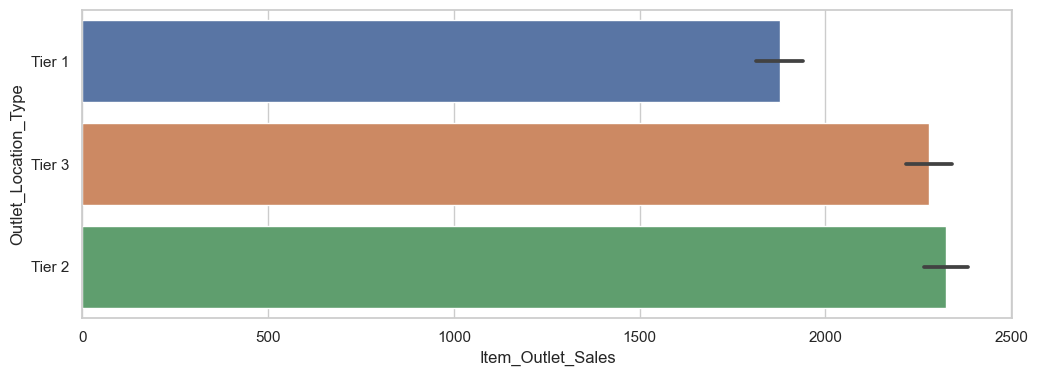

In [7]:
plt.figure(figsize=(12, 4))
sns.barplot(x = "Item_Outlet_Sales", y="Outlet_Location_Type", data=df)

<AxesSubplot:xlabel='Outlet_Type'>

<Figure size 1200x400 with 0 Axes>

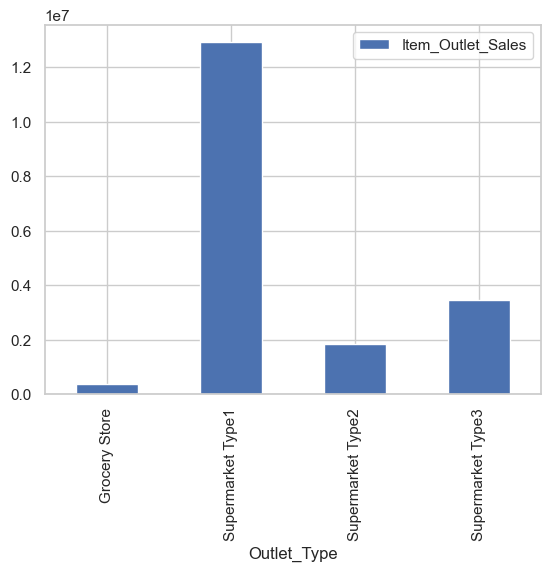

In [8]:
plt.figure(figsize=(12, 4))
df.groupby(['Outlet_Type']).agg({"Item_Outlet_Sales": "sum"}).plot(kind="bar")

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

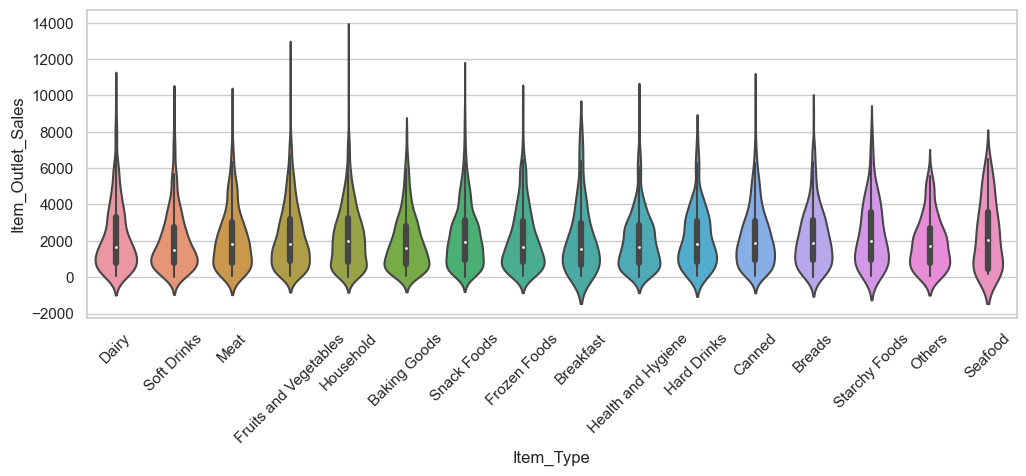

In [9]:
figure, ax = plt.subplots(figsize=(12, 4))
ax = sns.violinplot(x= "Item_Type", y="Item_Outlet_Sales", data=df)
ax.set_xticklabels(labels = df['Item_Type'].unique(), rotation=45)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

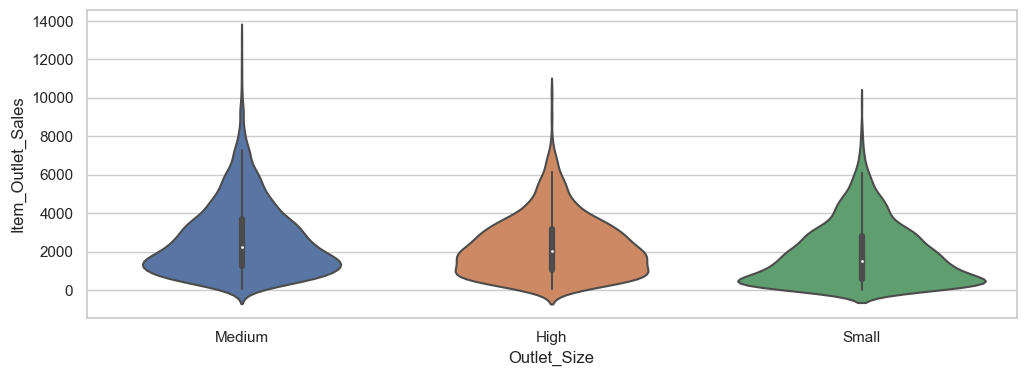

In [10]:
plt.figure(figsize=(12, 4))
sns.violinplot(x="Outlet_Size", y="Item_Outlet_Sales", data=df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

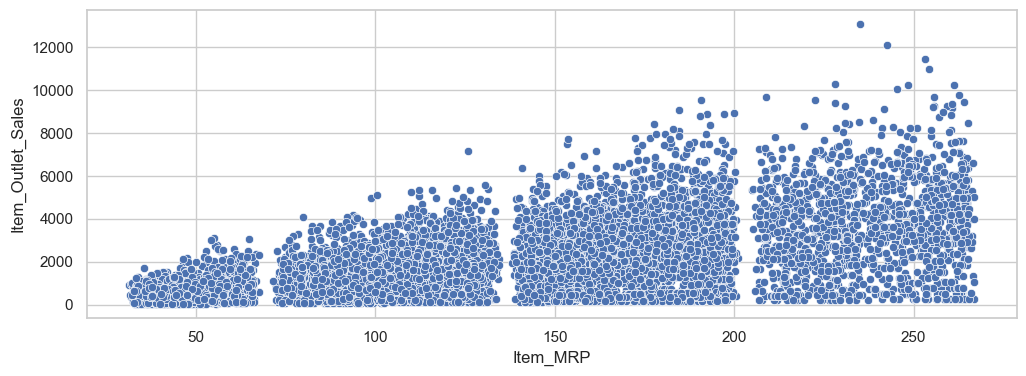

In [11]:
fig, ax = plt.subplots(figsize= (12, 4))
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=df)

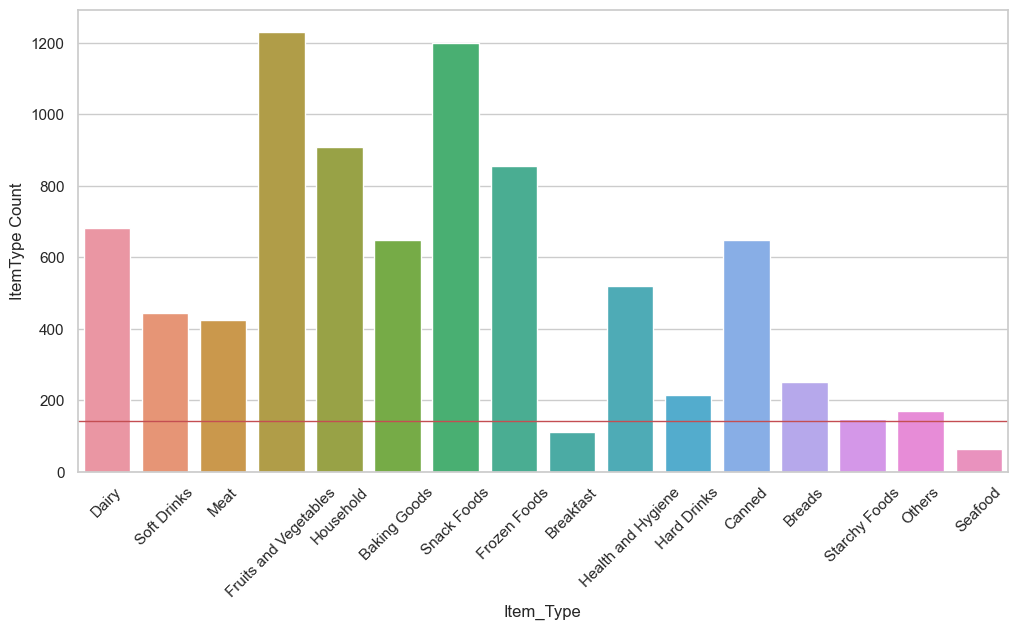

In [12]:
avg_mrp = df.Item_MRP.mean()
figure, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="Item_Type", data=df)
ax.set_xticklabels(labels= df.Item_Type.unique(), rotation=45)
ax.set_ylabel(ylabel="ItemType Count")
ax.axhline(y=avg_mrp, linewidth=1, color='r')

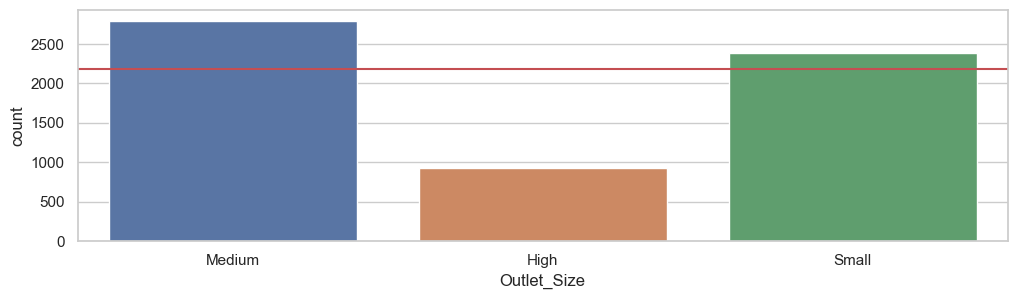

In [13]:
figure, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x=df.Outlet_Size, data=df)
ax.axhline(y=df.Item_Outlet_Sales.mean(), color='r')

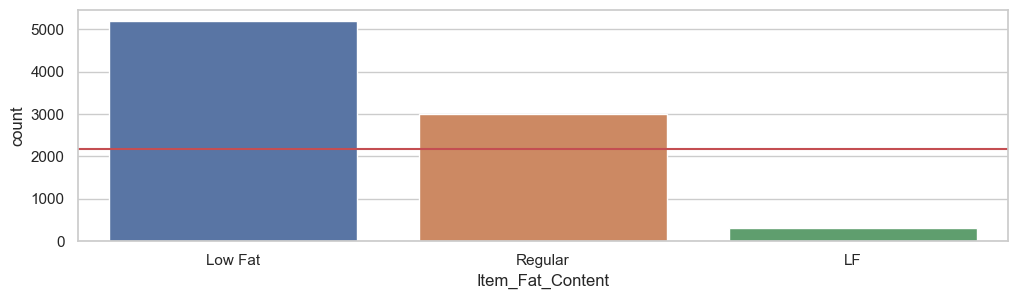

In [14]:
figure, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x = "Item_Fat_Content", data=df)
ax.axhline(y=df.Item_Outlet_Sales.mean(), color='r')

#### Data - Preprocessing

In [15]:
df.isnull().sum()/ len(df)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [16]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
num_cols=df.columns[df.dtypes == 'float64']
cat_cols = df.columns[df.dtypes == "object"]

In [18]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [19]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [20]:
def labelencoding(df: pd.DataFrame) -> pd.DataFrame:
    try:
        for x in df.columns:
            if x in df.select_dtypes(include="object"):
                df[x] = df[x].astype('category').cat.codes
        return df
    except Exception as e:
        print(e)
        print("Encoding error")

In [21]:
df = labelencoding(df)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,-1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [22]:
df.dtypes

Item_Identifier                int16
Item_Weight                  float64
Item_Fat_Content                int8
Item_Visibility              float64
Item_Type                       int8
Item_MRP                     float64
Outlet_Identifier               int8
Outlet_Establishment_Year      int64
Outlet_Size                     int8
Outlet_Location_Type            int8
Outlet_Type                     int8
Item_Outlet_Sales            float64
dtype: object

In [23]:
df.shape

(8523, 12)

In [33]:
from sklearn.preprocessing import StandardScaler

def scale_num_col(df: pd.DataFrame, target_col: str) ->pd.DataFrame:
    num_df = df.select_dtypes(exclude="object").drop(target_col, axis=1)
    num_cols = num_df.columns
    scaled_df= pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)
    new_df = df.drop(num_cols, axis=1)
    return pd.concat([new_df, scaled_df], axis=1)


In [34]:
ndf = scale_num_col(df=df, target_col='Item_Outlet_Sales')
ndf.head()

,Item_Outlet_Sales,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3735.1380,-1.388514,-0.766217,-0.585929,-0.970732,-0.766479,1.747454,1.507813,0.139541,0.337853,-1.369334,-0.252658
1,443.4228,-1.717991,-1.494175,1.270529,-0.908111,1.608963,-1.489023,-0.607071,1.334103,0.337853,1.091569,1.002972
2,2097.2700,-0.262057,0.999834,-0.585929,-0.956917,0.658786,0.010040,1.507813,0.139541,0.337853,-1.369334,-0.252658
3,732.3800,0.759769,1.365966,1.270529,-1.281758,-0.291391,0.660050,-1.664513,0.020085,-1.374111,1.091569,-1.508289
4,994.7052,1.151580,-0.845905,-0.585929,-1.281758,0.421242,-1.399220,-1.312032,-1.293934,-0.518129,1.091569,-0.252658


In [ ]:


num_df = df.select_dtypes(include="float64")
scaled_df = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)

In [ ]:
scaled_df

In [ ]:
df.head()

In [ ]:
df = labelencoding(df=df)

In [ ]:
df.head()

In [ ]:
df.Item_Identifier.astype('category').cat.codes

In [ ]:
df.Outlet_Identifier.unique()